In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

DATASET_PATH = "dataset"

In [22]:
sets = pd.read_csv(DATASET_PATH + "/sets.csv")

themes = pd.read_csv(DATASET_PATH + "/themes.csv")
themes.rename(columns = {'id':'theme_id'}, inplace = True)

sets = sets.merge(themes, on='theme_id', how='left')
sets.rename(columns = {'name_x':'set_name','name_y':'theme_name'}, inplace = True)

sets.set_num.nunique()

11673

In [23]:
inv = pd.read_csv(DATASET_PATH + "/inventories.csv")
inv.set_num.nunique()

11670

In [24]:
inv = inv.merge(sets, on='set_num', how='left')
inv.set_num.nunique()

11670

In [25]:
inv_part = pd.read_csv(DATASET_PATH + "/inventory_parts.csv")

colors = pd.read_csv(DATASET_PATH + "/colors.csv")
colors.rename(columns = {'id':'color_id'}, inplace = True)

inv_part = inv_part.merge(colors, on='color_id', how='left')
inv_part.rename(columns = {'inventory_id':'id'}, inplace = True)
inv_part.shape

(580251, 8)

In [26]:
df = inv_part.merge(inv, on='id', how='left')
print('Cantidad de tamaticas: ',df.theme_name.nunique())
df.head()

Cantidad de tamaticas:  379


,id,part_num,color_id,quantity,is_spare,name,rgb,is_trans,version,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id
0,1,48379c01,72,1,f,Dark Bluish Gray,6C6E68,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
1,1,48395,7,1,f,Light Gray,9BA19D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
2,1,mcsport6,25,1,f,Orange,FE8A18,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
3,1,paddle,0,1,f,Black,05131D,f,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,Gravity Games,458.0
4,3,11816pr0005,78,1,f,Light Flesh,F6D7B3,f,1,3931-1,Emma's Splash Pool,2012,494,43,Friends,NaN


In [27]:
# Limpio algunas columnas
df = df.drop(['parent_id', 'theme_id', 'year', 'set_name', 'version', 'is_trans', 'name', 'is_spare',  'quantity',
              'color_id', 'part_num',  'id'], axis = 'columns')
df

,rgb,set_num,num_parts,theme_name
0,6C6E68,7922-1,4,Gravity Games
1,9BA19D,7922-1,4,Gravity Games
2,FE8A18,7922-1,4,Gravity Games
3,05131D,7922-1,4,Gravity Games
4,F6D7B3,3931-1,43,Friends
...,...,...,...,...
580246,05131D,75090-2,253,Star Wars Rebels
580247,A0A5A9,75090-2,253,Star Wars Rebels
580248,FFFFFF,75090-2,253,Star Wars Rebels
580249,05131D,75090-2,253,Star Wars Rebels


Cantidad de sets: 10713


<AxesSubplot:xlabel='theme_name'>

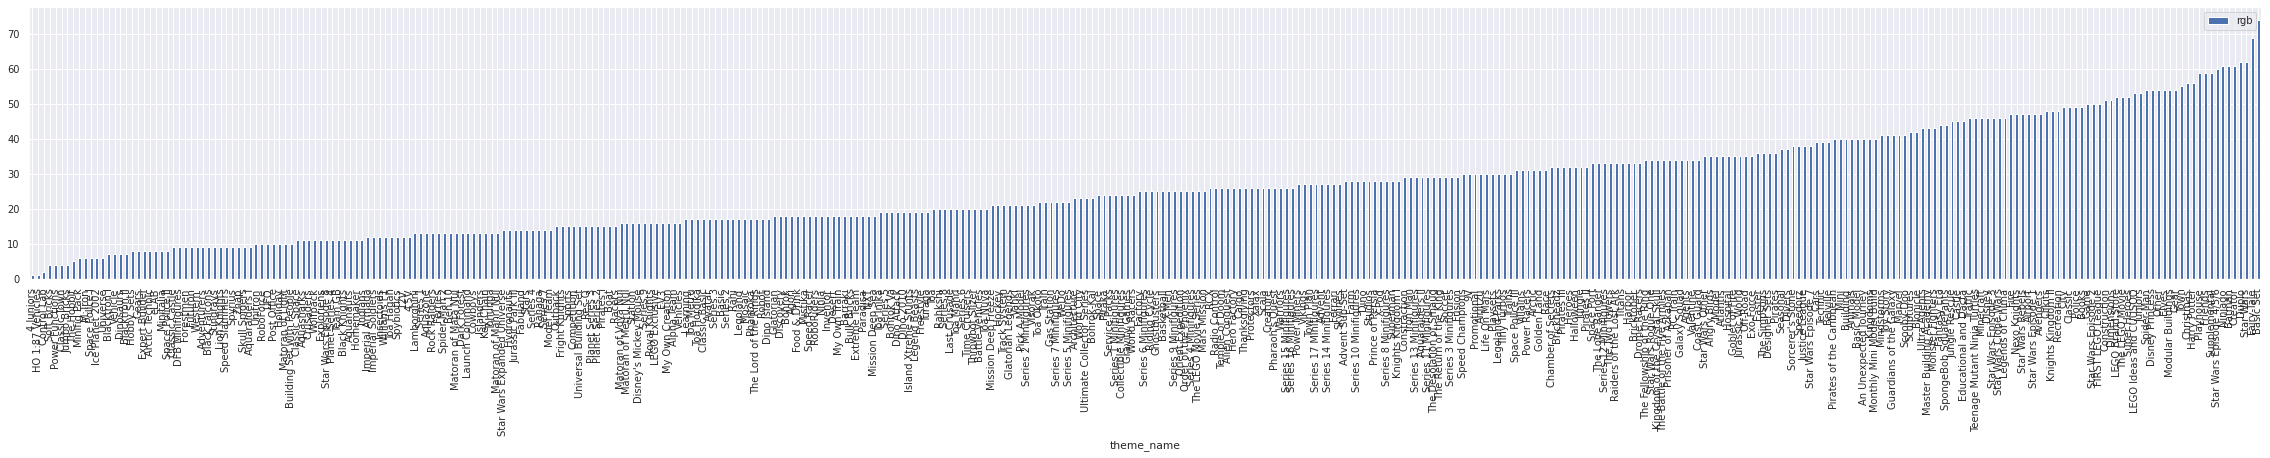

In [65]:
print('Cantidad de sets: {}'.format(df.set_num.nunique()))

#df_g=df.groupby('set_num',as_index=False)['rgb'].nunique()


df_g=df.groupby('theme_name',as_index=False)['rgb'].nunique()

df_g=df_g.sort_values(by=['rgb'])



#df_g.plot.bar(x = 'set_num', y = 'rgb')
df_g.plot.bar(x = 'theme_name', y = 'rgb', figsize = (40,5))

In [29]:
#df_d = df.drop_duplicates(ignore_index = True)
#df_d = df_d.drop(['name', 'set_name','num_parts', 'theme_name'], axis = 'columns')
#print (df_d.shape)
#df_d.head()

#df_d.pivot(index= 'set_num', columns = 'color_id', values='rgb')
#df_d.T  

In [30]:
# Frecuency encoder RGB
rgb_frecuency = df.rgb.value_counts(normalize = True).rename_axis('rgb').reset_index(name='rgb_frec')

# Frecuency encoder temáticas
theme_frecuency = df.theme_name.value_counts(normalize = True).rename_axis('theme_name').reset_index(name='theme_frec')

#theme_frecuency.theme_frec.unique().shape
rgb_frecuency

,rgb,rgb_frec
0,05131D,0.202362
1,FFFFFF,0.114923
2,C91A09,0.096420
3,A0A5A9,0.095333
4,6C6E68,0.075679
...,...,...
116,E6E3DA,0.000003
117,3CB371,0.000003
118,F3CF9B,0.000003
119,9391E4,0.000003


In [31]:
# Se agregan n columnas para caracterizar cada theme por sus n colores mas relevantes
n = 15

for i in range(n):
    df['rgb{}'.format(i+1)]=0

In [32]:
df = df.merge(rgb_frecuency, on='rgb', how='left')
df = df.merge(theme_frecuency, on='theme_name', how='left')
print(df.shape)
df.head()

(580251, 21)


,rgb,set_num,num_parts,theme_name,rgb1,rgb2,rgb3,rgb4,rgb5,rgb6,...,rgb8,rgb9,rgb10,rgb11,rgb12,rgb13,rgb14,rgb15,rgb_frec,theme_frec
0,6C6E68,7922-1,4,Gravity Games,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.075679,0.000570
1,9BA19D,7922-1,4,Gravity Games,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.043669,0.000570
2,FE8A18,7922-1,4,Gravity Games,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.010564,0.000570
3,05131D,7922-1,4,Gravity Games,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.202362,0.000570
4,F6D7B3,3931-1,43,Friends,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.003140,0.028613


In [33]:
for tematica in df.theme_name.unique():
    df_rgb = df.loc[df.theme_name == tematica].rgb.value_counts()[0:n].rename_axis('rgb').reset_index(name='sum')
    df_rgb = df_rgb.merge(rgb_frecuency, on='rgb', how='left').sort_values('rgb_frec', ascending = False)
    if (n > df_rgb.shape[0]):
        for i in range(df_rgb.shape[0]):
            df.loc[df.theme_name == tematica, 'rgb{}'.format(i+1)] = df_rgb.iat[i,2]
    else:
        for i in range(n):
            df.loc[df.theme_name == tematica, 'rgb{}'.format(i+1)] = df_rgb.iat[i,2]

In [34]:
df

,rgb,set_num,num_parts,theme_name,rgb1,rgb2,rgb3,rgb4,rgb5,rgb6,...,rgb8,rgb9,rgb10,rgb11,rgb12,rgb13,rgb14,rgb15,rgb_frec,theme_frec
0,6C6E68,7922-1,4,Gravity Games,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,...,0.020410,0.013117,0.006471,0.006159,0.005968,0.003457,0.003399,0.000293,0.075679,0.000570
1,9BA19D,7922-1,4,Gravity Games,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,...,0.020410,0.013117,0.006471,0.006159,0.005968,0.003457,0.003399,0.000293,0.043669,0.000570
2,FE8A18,7922-1,4,Gravity Games,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,...,0.020410,0.013117,0.006471,0.006159,0.005968,0.003457,0.003399,0.000293,0.010564,0.000570
3,05131D,7922-1,4,Gravity Games,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,...,0.020410,0.013117,0.006471,0.006159,0.005968,0.003457,0.003399,0.000293,0.202362,0.000570
4,F6D7B3,3931-1,43,Friends,0.202362,0.114923,0.09642,0.095333,0.066931,0.024417,...,0.020410,0.013170,0.008496,0.003404,0.002723,0.002628,0.001968,0.001391,0.003140,0.028613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580246,05131D,75090-2,253,Star Wars Rebels,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,...,0.024417,0.023578,0.010564,0.007571,0.006159,0.003840,0.003449,0.003140,0.202362,0.005156
580247,A0A5A9,75090-2,253,Star Wars Rebels,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,...,0.024417,0.023578,0.010564,0.007571,0.006159,0.003840,0.003449,0.003140,0.095333,0.005156
580248,FFFFFF,75090-2,253,Star Wars Rebels,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,...,0.024417,0.023578,0.010564,0.007571,0.006159,0.003840,0.003449,0.003140,0.114923,0.005156
580249,05131D,75090-2,253,Star Wars Rebels,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,...,0.024417,0.023578,0.010564,0.007571,0.006159,0.003840,0.003449,0.003140,0.202362,0.005156


In [35]:
#for tematica in df.theme_name.unique():
#    df_rgb=pd.DataFrame(df.loc[df.theme_name == tematica].rgb.value_counts()[0:n])
#    if (n > df_rgb.shape[0]):
#        for i in range(df_rgb.shape[0]):
#            df.loc[df.theme_name == tematica, 'rgb{}'.format(i+1)] = df_rgb.index[i]
#    else:
#        for i in range(n):
#            df.loc[df.theme_name == tematica, 'rgb{}'.format(i+1)] = df_rgb.index[i]

In [36]:
df_d = df.drop(['rgb', 'set_num', 'rgb_frec'], axis = 'columns')
df_d = df_d.drop_duplicates(ignore_index = True)
df_d

,num_parts,theme_name,rgb1,rgb2,rgb3,rgb4,rgb5,rgb6,rgb7,rgb8,rgb9,rgb10,rgb11,rgb12,rgb13,rgb14,rgb15,theme_frec
0,4,Gravity Games,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,0.023578,0.020410,0.013117,0.006471,0.006159,0.005968,0.003457,0.003399,0.000293,0.000570
1,43,Friends,0.202362,0.114923,0.09642,0.095333,0.066931,0.024417,0.023578,0.020410,0.013170,0.008496,0.003404,0.002723,0.002628,0.001968,0.001391,0.028613
2,20,Insectoids,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,0.013170,0.013117,0.004452,0.003657,0.003399,0.003395,0.000000,0.000000,0.000000,0.001384
3,2,Town,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013170,0.013117,0.010564,0.007080,0.010361
4,10,Supplemental,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.020410,0.013170,0.013117,0.010564,0.008496,0.006551,0.005968,0.010184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,447,Star Wars Episode 4/5/6,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.013117,0.007571,0.006159,0.005968,0.003140,0.029913
6982,423,Jungle,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013170,0.013117,0.005968,0.003404,0.001863
6983,10,Series 17 Minifigures,0.202362,0.114923,0.09642,0.095333,0.066931,0.023578,0.020410,0.007571,0.006969,0.002647,0.002116,0.002040,0.001682,0.000562,0.000545,0.000362
6984,378,Jungle,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013170,0.013117,0.005968,0.003404,0.001863


In [37]:
df_d.isna().sum()

num_parts     0
theme_name    0
rgb1          0
rgb2          0
rgb3          0
rgb4          0
rgb5          0
rgb6          0
rgb7          0
rgb8          0
rgb9          0
rgb10         0
rgb11         0
rgb12         0
rgb13         0
rgb14         0
rgb15         0
theme_frec    0
dtype: int64

### Reducción de dimesiones

Primero buscamos variables de varianza 0 (constante). Antes, transformamos el dataset en train y test, con relación 0.7 y 0.3 respectivamente.

In [53]:
X = df_d[['num_parts','rgb1','rgb2','rgb3','rgb4','rgb5','rgb6','rgb7','rgb8','rgb9','rgb10','rgb11','rgb12','rgb13','rgb14','rgb15']]
y = df_d[['theme_frec']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train.shape, X_test.shape, y_train.shape

((4680, 16), (2306, 16), (4680, 1))

In [58]:
X_train

,num_parts,rgb1,rgb2,rgb3,rgb4,rgb5,rgb6,rgb7,rgb8,rgb9,rgb10,rgb11,rgb12,rgb13,rgb14,rgb15
6701,66,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.020410,0.013170,0.013117,0.010564,0.005699,0.004057,0.003840
2354,27,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.020410,0.013170,0.013117,0.007080,0.005968,0.005699,0.003449
1859,328,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.020410,0.013170,0.007080,0.006471,0.005699,0.004452
190,183,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.024417,0.023578,0.020410,0.010564,0.008496,0.007571,0.006471,0.001374
484,20,0.202362,0.096420,0.043669,0.023578,0.013117,0.001682,0.001225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,99,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.020410,0.013170,0.007080,0.006471,0.005699,0.004452
5192,219,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013117,0.005968,0.005699,0.001346
3980,119,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.023578,0.020410,0.013170,0.013117,0.010564,0.005699,0.004057
235,98,0.202362,0.114923,0.096420,0.095333,0.075679,0.066931,0.051455,0.043669,0.020410,0.013170,0.007080,0.005699,0.004452,0.004057,0.003840


In [63]:
var = np.std(X_train, axis=0)**2
var


num_parts    144102.984234
rgb1              0.000205
rgb2              0.000069
rgb3              0.000065
rgb4              0.000234
rgb5              0.000194
rgb6              0.000261
rgb7              0.000257
rgb8              0.000176
rgb9              0.000054
rgb10             0.000050
rgb11             0.000024
rgb12             0.000016
rgb13             0.000009
rgb14             0.000006
rgb15             0.000003
dtype: float64

In [39]:
X

,num_parts,rgb1,rgb2,rgb3,rgb4,rgb5,rgb6,rgb7,rgb8,rgb9,rgb10,rgb11,rgb12,rgb13,rgb14,rgb15
0,4,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,0.023578,0.020410,0.013117,0.006471,0.006159,0.005968,0.003457,0.003399,0.000293
1,43,0.202362,0.114923,0.09642,0.095333,0.066931,0.024417,0.023578,0.020410,0.013170,0.008496,0.003404,0.002723,0.002628,0.001968,0.001391
2,20,0.202362,0.114923,0.09642,0.066931,0.051455,0.043669,0.013170,0.013117,0.004452,0.003657,0.003399,0.003395,0.000000,0.000000,0.000000
3,2,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013170,0.013117,0.010564,0.007080
4,10,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.020410,0.013170,0.013117,0.010564,0.008496,0.006551,0.005968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,447,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.013117,0.007571,0.006159,0.005968,0.003140
6982,423,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013170,0.013117,0.005968,0.003404
6983,10,0.202362,0.114923,0.09642,0.095333,0.066931,0.023578,0.020410,0.007571,0.006969,0.002647,0.002116,0.002040,0.001682,0.000562,0.000545
6984,378,0.202362,0.114923,0.09642,0.095333,0.075679,0.066931,0.051455,0.043669,0.024417,0.023578,0.020410,0.013170,0.013117,0.005968,0.003404


In [40]:
corr = X.corr()
corr.shape

(16, 16)

<AxesSubplot:>

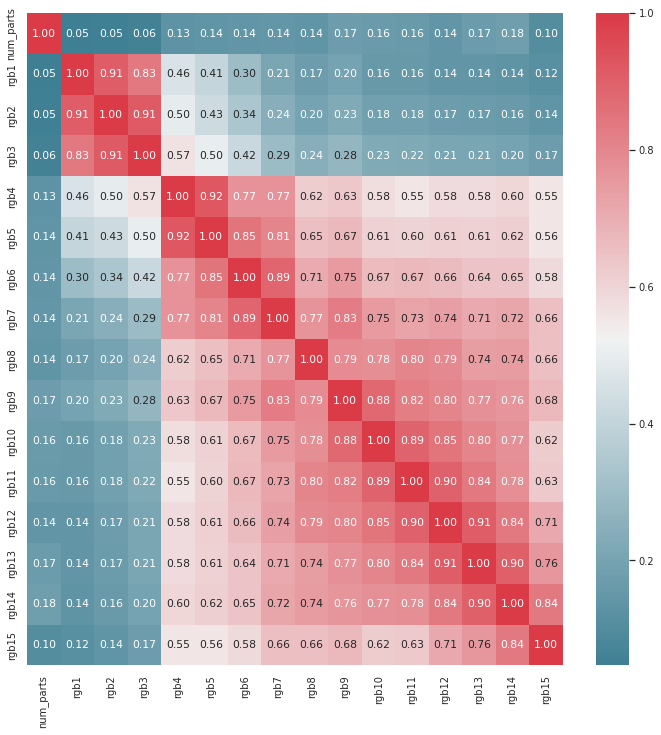

In [51]:
sns.set(font_scale=0.9, rc = {'figure.figsize':(12,12)})
sns.heatmap(corr, cmap = sns.diverging_palette(220,10,as_cmap = True), annot = True, fmt = ".2f")
